## Download and prepare the dataset

In [1]:
# Video is here -
# https://www.youtube.com/watch?v=it1Lu7NmMpw&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR

# to download the dataset run
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git
# this will upload files to the colab environment, not to local machine

# Useful links:

# Full dataset: https://www.kaggle.com/agrigorev/clothing-dataset-full
# Subset: https://github.com/alexeygrigorev/clothing-dataset-small
# Corresponding Medium article: https://medium.com/data-science-insider/clothing-dataset-5b72cd7c3f1f
# CS231n CNN for Visual Recognition: https://cs231n.github.io/


Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
!nvidia-smi # nvidia system information for T4 Tesla GPU

Sun Nov 30 20:26:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

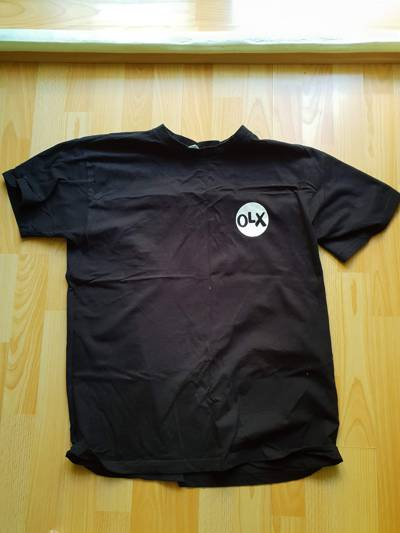

In [3]:
# On colab everything should be preinstalled, on local machine you need to install tensorflow
# !pip install tensorflow

# from tensorflow.keras.processing.image import load_img

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

# If the import of .. keras.processing.image import load_img is not working, try using
from tensorflow.keras.utils import load_img

# we can play with load_ing like so:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname) # this will load big image - its full size available on the repo


In [4]:
img = load_img(fullname, target_size=(299, 299)) # as our NN was trained on 299x299 images

x = np.array(img) # convert to array

x.shape # 299 px x 299 px x 3 colors for each pixel

# See explanation on Pillow library here:
# https://knowmledge.com/2023/11/19/ml-zoomcamp-2023-deep-learning-part-3/
# and video:
# https://www.youtube.com/watch?v=R6o_CUmoN9Q&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=70


(299, 299, 3)

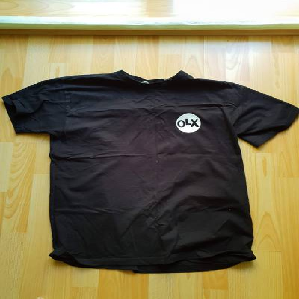

In [5]:
img # image now is smaller - we compressed it to 299x299 already during second load...


In [6]:
print(img) # <PIL.Image.Image image mode=RGB size=299x299 at 0x7D8B37A1EE10>
# because we used load_img and it is based on PIL -> pillow image library


<PIL.Image.Image image mode=RGB size=299x299 at 0x79EC4CA0FD10>


## Load a pre-trained model named Xception

In [7]:
# On colab everything should be preinstalled, on local machine we need to install tensorflow
# !pip install tensorflow

# This time we want to take an image and an off-the-shelf neural network that was already
# trained by somebody, so we can use it. Now we want to use a special model called “Xception”
# from Keras which was trained on ImageNet. You can find more pre-trained models on Keras.
# Before defining the model we need some imports first.

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

# weights = "imagenet" means we want to use pre-trained network that was trained on imagenet

model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)



91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
# Now we want to use this model to classify the image, we used before.
# But this time the model.predict function expects a bunch of images.
# So let’s create an array with possibly multiple images. In this case it is just one.

X = np.array([x])
X.shape

# Output: (1, 299, 299, 3)
# Eariier we did this: x = np.array(img) and image was resized to (299, 299, 3) already

x.shape

(299, 299, 3)

In [9]:
# To do the prediction, we need some preprocessing before. This model expects
# inputs in a certain way using the preprocess_input function.

X = preprocess_input(X) # we import preprocess_input from keras utils earlier
# X[0] # prints our image as 3 channels data for RGB - pixel values
# but preprocessed - from -1 to 1 - similar way as when model was trained



In [10]:
# if we simply run model.predict(X) like so:
# model.predict(X)

# prints array([[8.63965077e-04, 7.74647691e-04, 4.90004430e-04, 1.16718875e-03, ...
# so we will get predictions of all image classes the model is trained on

pred = model.predict(X)
pred.shape

# prints (1, 1000)
# This 1000 means that there are 1000 different classes and 1 means there is one image.



1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step


(1, 1000)

In [11]:
# Each value  in the printout is the probability that this image belongs to some class.
# To be able to make sense from this output, we need to know what are the classes.
# Therefor we need another function called decode_predictions to make the prediction human readable.
# from tensorflow.keras.applications.xception import decode_predictions

decode_predictions(pred)

# predictions are far from t-shirt downloaded but Xception model is not that good out
# of the box for fashion predictions - thus we need to use a transfer learning
# to improve our CNN - pre-trained convolutional neural network ...


35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', np.float32(0.68196356)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139977)),
  ('n04370456', 'sweatshirt', np.float32(0.034324735)),
  ('n03710637', 'maillot', np.float32(0.011354207)),
  ('n04525038', 'velvet', np.float32(0.0018453562))]]

## Convolutional neural networks (CNN) and transfer learning

In [12]:
# Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. Usually a pretrained model is trained with large volume of images and that is why the convolutional layers and vector representation of this model can be used for other tasks as well. However, the dense layers need to be retrained because they are specific to the dataset to make predictions with. In our problem, we want to keep convoluational layers but we want to train new dense layers.

# Following are the steps to create train/validation data for model:

# Build image generator for training (takes preprocessing input function)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

# Output: Found 3068 images belonging to 10 classes.
# This time we resize images to one-quarter - 150x150 pixels - to shorten
# training time approx 4 times

Found 3068 images belonging to 10 classes.


In [13]:
# In the train dataset we see that 3,068 were found belonging to 10 classes.
# To see which classes are there we can use:

# train_ds.class_indices # corresponds to our training directory structure


In [14]:
# The classes names are inferred from the train folder structure.
# That means everything that is inside the folder t-shirt is put under the t-shirt class.

!ls /content/clothing-dataset-small/train
# dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


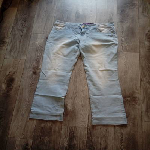

In [15]:
# Then we can look at what this dataset generates. We use an iterator
# to be able to get the next batch. (A for-loop does this internally).

# next(train_ds)
# ... array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], ...
# it means our first image is skirt - classes are one-hot encoded

X, y = next(train_ds) # X has our features = images, y has all labels

# quick sanity check:
!ls /content/clothing-dataset-small/train
print(y[0]) # our image class after 1-hot encoding
# to make sure that class and image fit - results are different as we shuffle
img_array_reversed = (X[0] + 1) / 2 * 255
img_array_reversed = img_array_reversed.astype(np.uint8)

from PIL import Image

# Convert the NumPy array back to a PIL Image
img_restored = Image.fromarray(img_array_reversed)

# Display the restored image
display(img_restored)


In [16]:
# Let’s do the same for validation data - but without shuffling this time
# as we need val dataset to be the same all the time to compare results

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

# Found 341 images belonging to 10 classes.



Found 341 images belonging to 10 classes.


In [17]:
len(y) # 32 because our batch size is 32 - NEXT function takes 32 shuffled
# images from the train dir and allocate labels for each to array y

32

In [18]:
np.shape(y) # even more detail about y )) similar to y.shape
# (32, 10) - 32 1-hot encoded vectors of length 10 as we have 10 categories

(32, 10)

In [19]:
# .. or we just can simply look inside our labels array y like so:
# y # array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],....

In [20]:
# now the fun part starts -
# Following are the steps to build model from a pretrained model:

# STEP 0 - Build base model for transfer learning - keep only convolution layers
base_model = Xception(weights='imagenet',
                      include_top=False, # to create custom dense layer
                      input_shape=(150,150,3))
# we keep for now small size for our images - 150x150 px to save time
# base_model # <Functional name=xception, built=True>

# BTW below is a functional style of model building - we invoke each layer as function:

# STEP 1 - Freeze the convolutional base by preventing the weights being updated during training
base_model.trainable = False

# STEP 2 - Define expected image shape as input
inputs = keras.Input(shape=(150,150,3))

# STEP 3 - Feed inputs to the base model
base = base_model(inputs, training=False)
# set False because the model contains BatchNormalization layer

# STEP 4 - Convert matrices into vectors using pooling layer
vectors = keras.layers.GlobalAveragePooling2D()(base)
# this is super important - our images went through convolutions and turned
# into vector reprezentations here in the pooling layer

# STEP 5 - Create dense layer of 10 classes - this layer we train
outputs = keras.layers.Dense(10)(vectors)
# dense layer is for matrix multiplication - trained model weights are
# multiplied by image vectors extracted in the previous step 4
# resulting vector with dimension 10 after softmax will give us 1-hot
# encoding for the image classes we baked in - 10 image classes

# STEP 6 - Create model for training
model = keras.Model(inputs, outputs)
model # <Functional name=functional, built=True>

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


<Functional name=functional, built=True>

In [21]:
# Following are the steps to instantiate optimizer and loss function:

# STEP 7 - Define learning rate
learning_rate = 0.01

# STEP 8 - Create optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# STEP 9 - Define loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
# to keep the raw output of dense layer without applying softmax

# STEP 10 - Compile the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy']) # evaluation metric accuracy
model # <Functional name=functional, built=True> -- in fact compiled...

<Functional name=functional, built=True>

In [22]:
# The model is ready to train once it is defined and compiled:

# Train the model, validate it with validation data,
# and save the training history - SWITCH TO GPU OR IT TAKES FOREVER:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 388ms/step - accuracy: 0.5750 - loss: 1.7451 - val_accuracy: 0.7595 - val_loss: 0.9562
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8419 - loss: 0.5021 - val_accuracy: 0.7889 - val_loss: 0.9399
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8805 - loss: 0.3525 - val_accuracy: 0.7771 - val_loss: 1.0466
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9194 - loss: 0.2298 - val_accuracy: 0.7830 - val_loss: 0.9553
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9419 - loss: 0.1713 - val_accuracy: 0.7889 - val_loss: 0.9779
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9467 - loss: 0.1452 - val_accuracy: 0.7947 - val_loss: 0.9528
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9528 - loss: 0.1250 - val_accuracy: 0.7801 - val_loss: 1.0970
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9801 - loss: 0.0589 - val_accuracy: 0.8123 - val_loss: 

In [23]:
# Classes, function, and attributes we used earlier:

# from tensorflow.keras.preprocessing.image import ImageDataGenerator: to read the image data and make it useful for training/validation

# flow_from_directory(): method to read the images directly from the directory

# next(train_ds): to unpack features and target variables

# train_ds.class_indices: attribute to get classes according to the directory structure

# GlobalAveragePooling2D(): accepts 4D tensor as input and operates the mean on the height and width dimensionalities for all the channels and returns vector representation of all images - to build a pooling layer and get vector representation of an image

# CategoricalCrossentropy(): method to produces a one-hot array containing the probable match for each category in multi classification

# model.fit(): method to train model

# epochs: number of iterations over all of the training data

# history.history: history attribute is a dictionary recording loss and metrics values (accuracy in our case) for each epoch

# Discrepancy in accuracy values:
# The training loss is decreasing and the accuracy for validation in the first epoch is 72%. Comparing the training accuracy with the validation accuracy we see both values increasing over time until epoch 3. There is a discrepancy between both accuracy values. There is a difference of about 10%. Another thing is that training accuracy keeps improving but on the validation data not so much. That could mean that the model starts to overfit already. When we look at validation accuracy we see that it oscillates around 80%. In the same time the accuracy on training data is very high (it’s almost 1). That are really good signs for an overfitting model. The results are saved in the history object. We’re interested in training accuracy and validation accuracy.

# history.history['accuracy']
# Prints [0.6646023392677307,
#  0.8243154883384705,
#  0.8728813529014587,
#  0.9093872308731079,
#  0.9514341354370117,
#  0.9573011994361877,
#  0.9752281904220581,
#  0.979139506816864,
#  0.9921773076057434,
#  0.9983702898025513]
history.history['val_accuracy'] # not improving after 4th epoch  0.81818181...

[0.759530782699585,
 0.7888563275337219,
 0.7771260738372803,
 0.7829912304878235,
 0.7888563275337219,
 0.7947214245796204,
 0.7800586223602295,
 0.8123167157173157,
 0.8181818127632141,
 0.8064516186714172]

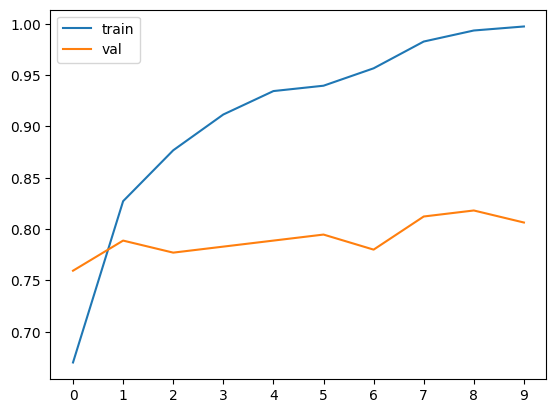

In [24]:
# Or we can plot it to see what is happening:

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()
# val accuracy peak is on our 4th epoch while train is growing:

In [25]:
# The first peak is after one epoch. Maybe the best model is after 4 epochs because the training accuracy is still not very high (<95%). But the model after one epoch is already quite ok. This value of almost 80% is a good one because it’s without any tuning. There are many parameters to tune. We’ll tune the most important one in the next section below...

## Adjusting the learning rate - hyperparameters tuning

In [26]:
# One of the most important hyperparameters of deep learning models is the learning rate. It is a tuning parameter in an optimization function that determines the step size (how big or small) at each iteration while moving toward a mininum of a loss function.

# Imagine you have a book, and you want to read it. The learning rate represents how fast you can read and absorb its content. If you read the book very quickly, you risk forgetting important parts and struggling to recall key details when you need to apply them. On the other hand, reading slowly allows you to study each concept thoroughly and understand it deeply, ensuring better retention. However, if you read too slowly, you might never finish the book. The goal is to find the right reading pace, or learning rate, that balances comprehension and efficiency. Reading too fast may result in superficial understanding, while reading too slowly might mean not acquiring knowledge quickly enough to meet your goals. By maintaining a moderate, balanced pace, you can maximize understanding and effectively apply what you've learned.

# This analogy relates to training machine learning models. Training a model is like reading a book: you're trying to "learn" from the data. Applying that knowledge during testing or validation corresponds to validating the model. If you train the model too quickly (with a high learning rate), it may overfit, memorizing the training data without generalizing well to new data. If you train it too slowly (with a low learning rate), it may underfit, failing to learn enough patterns from the data. A balanced learning rate ensures the model acquires sufficient knowledge and performs well on both training and validation data.

# We can experiement with different learning rates to find the optimal value where the model has best results. In order to try different learning rates, we should define a function to create a function first, for instance:

# Function to create model
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])

    return model

In [27]:
# Next, we can loop over on the list of learning rates:

# Dictionary to store history with different learning rates
scores = {}

from tqdm import tqdm

# # List of learning rates
# lrs = [0.0001, 0.001, 0.01, 0.1]

# for lr in tqdm(lrs):
#     print(lr)

#     model = make_model(learning_rate=lr)
#     history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#     scores[lr] = history.history

#     print()
#     print()

# scores # I comment it out to save time for future...

## Checkpointing to save good models as artifacts

In [28]:
# ModelCheckpoint callback is used with training the model to save a model or weights in a checkpoint file at some interval, so the model or weights can be loaded later to continue the training from the state saved or to use for deployment.

# Classes, function, and attributes:

# keras.callbacks.ModelCheckpoint: ModelCheckpoint class from keras callbacks api

# filepath: path to save the model file

# monitor: the metric name to monitor

# save_best_only: only save when the model is considered the best according to the metric provided in monitor

# mode: overwrite the save file based on either maximum or the minimum scores according the metric provided in monitor

# Saving the best model only
# How can we do this? After each epoch we trained we can evaluate the performance of the model on validation dataset. This we do for every epoch, then we look at the numbers and can invoke a callback. With this callback we can do anything we want. The evaluation on validation data is kind of callback. The history with all information is also kind of such a callback. This is just something we invoke after each epoch finishes

# Training a model with callbacks

model.save_weights('model_v1.weights.h5')

# Keras uses this template for saving files.
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)

# Output: 'xception_v1_03_0.840.h5'

'xception_v1_03_0.840.h5'

In [29]:
# save_best_only=True to save only when it’s an improvement regarding the last best result. mode='max' because we want to have a maximized accuracy, if we would use a loss value we should take mode='min'.

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [30]:
# Now we can use this defined callback and retrain the best model using this callback.

learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5032 - loss: 1.4819

96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 211ms/step - accuracy: 0.5045 - loss: 1.4781 - val_accuracy: 0.7918 - val_loss: 0.7110
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7893 - loss: 0.6368

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.7893 - loss: 0.6367 - val_accuracy: 0.7977 - val_loss: 0.6189
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8296 - loss: 0.5102

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.8296 - loss: 0.5102 - val_accuracy: 0.8240 - val_loss: 0.5747
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8661 - loss: 0.4391 - val_accuracy: 0.8094 - val_loss: 0.5525
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8926 - loss: 0.3795 - val_accuracy: 0.8182 - val_loss: 0.5306
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9151 - loss: 0.3159 - val_accuracy: 0.8123 - val_loss: 0.5377
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9296 - loss: 0.2758 - val_accuracy: 0.8182 - val_loss: 0.5437
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9464 - loss: 0.2423

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9463 - loss: 0.2425 - val_accuracy: 0.8299 - val_loss: 0.5182
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9381 - loss: 0.2378 - val_accuracy: 0.8270 - val_loss: 0.5319
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9511 - loss: 0.2118 - val_accuracy: 0.8299 - val_loss: 0.5332


## Adding more layers to the model

In [31]:
# It is also possible to add more layers between the vector representation layer and the output layer to perform intermediate processing of the vector representation. These layers are the same dense layers as the output but the difference is that these layers use relu activation function for non-linearity.

# Like learning rates, we should also experiment with different values of inner layer sizes:

# Function to define model by adding new dense layer
def make_model(learning_rate=0.01, size_inner=100): # default layer size is 100
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # adding here the new dense layer - inner - with variable size:
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    # note - activation function here is 'relu'
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])

    return model


In [32]:
# Next, train the model with different sizes of inner layer:

# Experiement different number of inner layer with best learning rate
# Note: We should've added the checkpoint for training but for simplicity we are skipping it
learning_rate = 0.001

scores = {}

# List of inner layer sizes
sizes = [10, 100, 1000]

for size in tqdm(sizes):
    print(size) # size is our hyperparameter there

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

scores
# Note: It may not always be possible that the model improves. Adding more layers mean introducing complexity in the model, which may not be recommended in some cases.

# In the next section, we'll try different regularization technique to improve the performance with the added inner layer.

# Notes:
# earlier after pooling we had 2048 bit vector and converted it
# to 10 classes. Now we introduce inner dense layer with 10, 100 or
# 1000 bit width with relu for non-linearity to beef up our processing...

# softmax takes raw scores from a dense layer and transforms it into a probability
# activation functions used for output vs activation functions used for intermediate steps
# have a look at http://cs231n.stanford.edu/2017/
# sigmoid: negativ input --> zero, positive input --> straight line
# relu
# softmax

  0%|          | 0/3 [00:00<?, ?it/s]

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 206ms/step - accuracy: 0.4290 - loss: 1.6712 - val_accuracy: 0.6540 - val_loss: 1.0550
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.6895 - loss: 0.9370 - val_accuracy: 0.7566 - val_loss: 0.7541
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.7671 - loss: 0.6795 - val_accuracy: 0.7830 - val_loss: 0.6870
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8094 - loss: 0.5700 - val_accuracy: 0.8006 - val_loss: 0.6428
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8577 - loss: 0.4571 - val_accuracy: 0.8035 - val_loss: 0.6114
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8751 - loss: 0.4084 - val_accuracy: 0.8065 - val_loss: 0.6045
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8951 - loss: 0.3673 - val_accuracy: 0.8094 - val_loss: 0.5981
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9125 - loss: 0.3182 - val_accuracy: 0.821

 33%|███▎      | 1/3 [01:40<03:21, 100.56s/it]



100
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 206ms/step - accuracy: 0.5614 - loss: 1.3335 - val_accuracy: 0.7889 - val_loss: 0.6621
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8180 - loss: 0.5439 - val_accuracy: 0.8065 - val_loss: 0.6049
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.8769 - loss: 0.3912 - val_accuracy: 0.8182 - val_loss: 0.5767
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9222 - loss: 0.2611 - val_accuracy: 0.8211 - val_loss: 0.5557
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9566 - loss: 0.1829 - val_accuracy: 0.8152 - val_loss: 0.6147
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9596 - loss: 0.1533 - val_accuracy: 0.8240 - val_loss: 0.5708
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9880 - loss: 0.0886 - val_accuracy: 0.8358 - val_loss: 0.5884
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9901 - loss: 0.0668 - val_accuracy: 0.

 67%|██████▋   | 2/3 [03:20<01:40, 100.25s/it]



1000
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 219ms/step - accuracy: 0.6184 - loss: 1.1762 - val_accuracy: 0.7595 - val_loss: 0.6806
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8506 - loss: 0.4377 - val_accuracy: 0.7801 - val_loss: 0.6732
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9231 - loss: 0.2506 - val_accuracy: 0.7977 - val_loss: 0.6880
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9530 - loss: 0.1541 - val_accuracy: 0.8152 - val_loss: 0.6079
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9729 - loss: 0.0943 - val_accuracy: 0.7889 - val_loss: 0.7142
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9919 - loss: 0.0474 - val_accuracy: 0.8123 - val_loss: 0.6342
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9878 - loss: 0.0409 - val_accuracy: 0.8358 - val_loss: 0.6511
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9956 - loss: 0.0226 - val_accuracy: 0

100%|██████████| 3/3 [05:01<00:00, 100.36s/it]

{10: {'accuracy': [0.5061929821968079,
   0.7050195336341858,
   0.7747718095779419,
   0.808670163154602,
   0.850391149520874,
   0.8725554347038269,
   0.8966753482818604,
   0.9035202264785767,
   0.9162320494651794,
   0.9312255382537842],
  'loss': [1.3903167247772217,
   0.8742662072181702,
   0.6560880541801453,
   0.5566441416740417,
   0.4663679301738739,
   0.4098046123981476,
   0.3621456027030945,
   0.3203018307685852,
   0.28742241859436035,
   0.257440447807312],
  'val_accuracy': [0.6539589166641235,
   0.7565982341766357,
   0.7829912304878235,
   0.8005865216255188,
   0.803519070148468,
   0.8064516186714172,
   0.8093841671943665,
   0.8211143612861633,
   0.8240469098091125,
   0.8181818127632141],
  'val_loss': [1.0550203323364258,
   0.7540982365608215,
   0.687025785446167,
   0.6428259015083313,
   0.6113907694816589,
   0.604505717754364,
   0.5980602502822876,
   0.5943140983581543,
   0.5850403904914856,
   0.5938898921012878]},
 100: {'accuracy': [0.664602

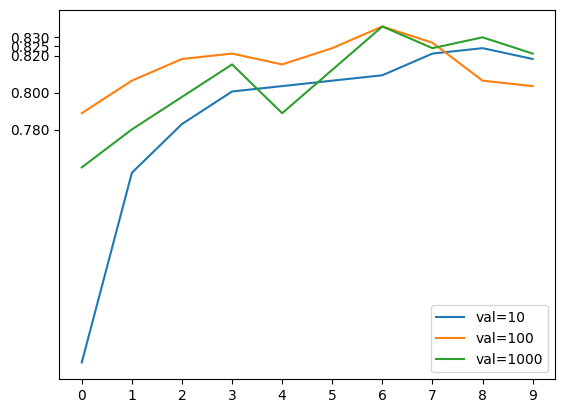

In [33]:
# Plotting to see our results - best model from checkpoints had
# val accuracy at 0.83% level -> no obvious improvement here?
# if we make inner layer of dimension 100 we can get 1% improvement -
# I saw it after 2 recalculations.

for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## Regularisation and dropout - adding even more layers

In [34]:
# Dropout is a technique that prevents overfitting in neural networks by randomly dropping nodes of a layer during training. As a result, the trained model works as an ensemble model consisting of multiple neural networks.

# From previous experiments we got the best values of learning rate 0.01 and layer size of 100. We'll use these values for the next experiment along with different values of dropout rates:

# Function to define model by adding new dense layer and dropout
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # previously added dense relu layer of size 100:
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    # newly added dropout layer:
    drop = keras.layers.Dropout(droprate)(inner)
    # we add dropout layer to randomly switch neurons off during training
    #  - so remaining neurons would train better...
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])

    return model


# Create checkpoint to save best model for version 3
filepath = './xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.001
size = 100

# Dict to store results
scores = {}

# List of dropout rates, 02 is the best
droprates = [0.0, 0.2, 0.5, 0.8]

for droprate in droprates:
    print(droprate)

    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       droprate=droprate)

    # Train for longer (epochs=30) cause of dropout regularization
    history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])
    scores[droprate] = history.history

    print()
    print()

# Note - due to dropout we need to train model for 30 epochs instead of 10
# so our notebook now runs about 30 mins or so on Colab T4.... ((



0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5469 - loss: 1.3604

96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 222ms/step - accuracy: 0.5481 - loss: 1.3566 - val_accuracy: 0.7977 - val_loss: 0.6345
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8080 - loss: 0.5465

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8080 - loss: 0.5463 - val_accuracy: 0.8094 - val_loss: 0.5895
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8778 - loss: 0.3509

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8778 - loss: 0.3511 - val_accuracy: 0.8270 - val_loss: 0.5259
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9191 - loss: 0.2613 - val_accuracy: 0.8152 - val_loss: 0.5438
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9502 - loss: 0.1921 - val_accuracy: 0.8270 - val_loss: 0.5341
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9729 - loss: 0.1274 - val_accuracy: 0.8123 - val_loss: 0.5890
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9844 - loss: 0.0929 - val_accuracy: 0.8094 - val_loss: 0.5700
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9936 - loss: 0.0660 - val_accuracy: 0.7947 - val_loss: 0.6382
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9908 - loss: 0.0556 - val_accuracy: 0.8035 - val_loss: 0.6264
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9986 - loss: 0.0377 - val_accuracy: 0.8152 - val_loss: 

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9406 - loss: 0.1997 - val_accuracy: 0.8534 - val_loss: 0.5309
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9653 - loss: 0.1393 - val_accuracy: 0.8006 - val_loss: 0.5763
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9685 - loss: 0.1180 - val_accuracy: 0.8240 - val_loss: 0.5433
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9768 - loss: 0.1036 - val_accuracy: 0.8152 - val_loss: 0.5810
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9859 - loss: 0.0803 - val_accuracy: 0.8240 - val_loss: 0.5564
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9898 - loss: 0.0727 - val_accuracy: 0.8182 - val_loss: 0.5888
Epoch 13/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9859 - loss: 0.0673 - val_accuracy: 0.8123 - val_loss: 0.5787
Epoch 14/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9890 - loss: 0.0551 - val_accuracy: 0.8299 - val_los

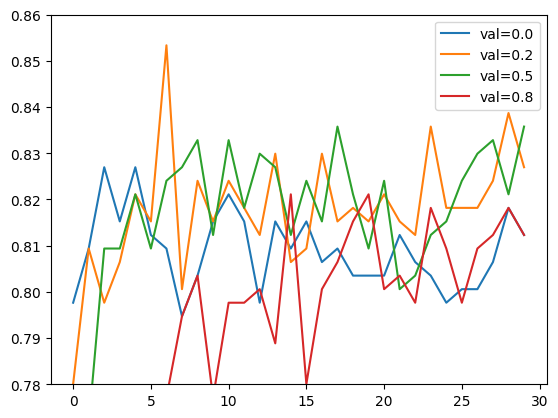

In [35]:
# plot training results

for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()


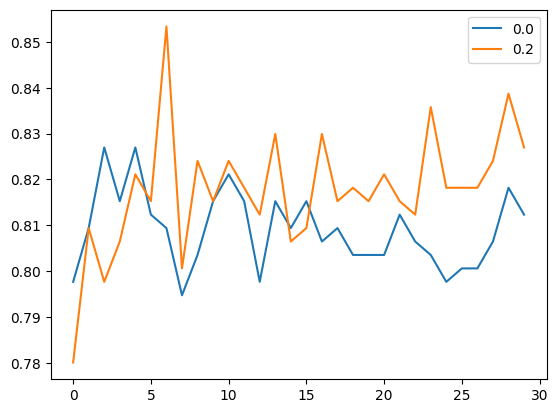

In [37]:
# if we plot only 2 best learning curves side by side:

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))
# I think top val accuracy now about 85% with dropout rate 0.2
# I saved 85% model to my laptop - just in case...
